In [233]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices
1. Gather data for nominal price of gas standardize on yearly price
2. Cleaning and transforming
3. Adjust prices for inflation
4. Graph the nominal and adjusted prices
5. Choose some other item with historical prices to compare to gas.

In [234]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text, "lxml")

In [235]:
trows = soup.find_all('tr')

# Format of our output:
The result will be a dictionary with two keys **year** and **price**
```
{ 'year': [1949, 1950, ...] 'price': [.28, .32, ....]}
```


In [236]:
allrows = []
for i in range(len(trows)):
    allrows.append(trows[i].find_all('td'))

# Populating the lists of the dictionary here.
The first line in the for loop adds the next year to the list.
The if else blocks either fill the corresponding spot on the price list with the price of leaded or unleaded data, respectively.

In [258]:
i = 0
j = 0
mydict = {}
mydict['Year'] = []
mydict['Price'] = []
for row in allrows[4:len(allrows)-7]:
    mydict['Year'].append(int(row[0].contents[0]))
    if int(row[0].contents[0])<1991:
        tmplist = row[1].contents[0]
        mydict['Price'].append(tmplist.split('\n')[-1])
    else:
        tmplist = row[3].contents[0]
        mydict['Price'].append(tmplist.split('\n')[-1])

    
print(len(mydict['Year']))
print(len(mydict['Price']))


63
63


# Clean up for cells that had strange formatting
These four years had missing data due to a superscript next to the prices. These lines add the relevent data.

In [259]:
mydict['Price'][29] = allrows[33][1].contents[-1]
mydict['Price'][34] = allrows[38][1].contents[-1]
mydict['Price'][39] = allrows[43][1].contents[-1]
mydict['Price'][40] = allrows[44][1].contents[-1]

In [260]:
# Checking output

In [309]:
for i in range(len(mydict['Price'])):
    tmp = mydict['Price'][i]
    tmp = float(tmp)
    mydict['Price'][i] = tmp

In [310]:
for i in range(len(mydict['Year'])):
    print(mydict['Year'][i], mydict['Price'][i], type(mydict['Year'][i]),type(mydict['Price'][i]))

1949 0.268 <class 'int'> <class 'float'>
1950 0.268 <class 'int'> <class 'float'>
1951 0.272 <class 'int'> <class 'float'>
1952 0.274 <class 'int'> <class 'float'>
1953 0.287 <class 'int'> <class 'float'>
1954 0.29 <class 'int'> <class 'float'>
1955 0.291 <class 'int'> <class 'float'>
1956 0.299 <class 'int'> <class 'float'>
1957 0.31 <class 'int'> <class 'float'>
1958 0.304 <class 'int'> <class 'float'>
1959 0.305 <class 'int'> <class 'float'>
1960 0.311 <class 'int'> <class 'float'>
1961 0.308 <class 'int'> <class 'float'>
1962 0.306 <class 'int'> <class 'float'>
1963 0.304 <class 'int'> <class 'float'>
1964 0.304 <class 'int'> <class 'float'>
1965 0.312 <class 'int'> <class 'float'>
1966 0.321 <class 'int'> <class 'float'>
1967 0.332 <class 'int'> <class 'float'>
1968 0.337 <class 'int'> <class 'float'>
1969 0.348 <class 'int'> <class 'float'>
1970 0.357 <class 'int'> <class 'float'>
1971 0.364 <class 'int'> <class 'float'>
1972 0.361 <class 'int'> <class 'float'>
1973 0.388 <class 

In [311]:
df = pd.DataFrame(mydict)
df.head(10)

,Price,Year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


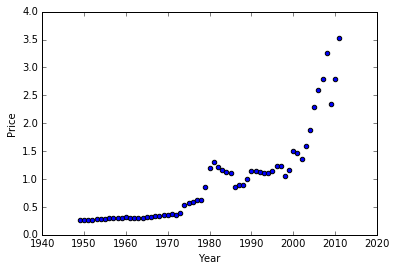

In [347]:
df.plot(x='Year',y='Price',kind='scatter')

In [348]:
cpi = pd.read_excel('cpi_data.xlsx', skiprows=range(9), header=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [349]:
cols = list(cpi)
cols.remove('HALF1')
cols.remove('HALF2')
cols.remove('Year')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [350]:
cpi[['Jan','Sep']].head()

,Jan,Sep
0,30.9,31.1
1,31.2,31.6
2,31.8,32.7
3,32.9,33.6
4,34.1,35.1


In [366]:
cpi['Year'] = cpi[cols].mean(axis=1)
cpi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Year
YEAR,,,,,,,,,,,,,,,
31.016667,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN,31.016667
31.508333,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN,31.508333
32.458333,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN,32.458333
33.358333,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN,33.358333
34.783333,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN,34.783333
36.683333,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN,36.683333
38.825000,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN,38.825000
40.491667,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN,40.491667
41.816667,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN,41.816667


In [369]:
cpi = cpi.set_index(keys='Year')

KeyError: 'Year'

In [368]:
cpi.ix[1964]

KeyError: 1964.0

In [354]:
nowcpi=238.78
oldcpi=31.01

nowcpi/oldcpi* 0.3

2.31002902289584

In [355]:
adj = df.merge(right=cpi,left_on='Year',right_index=True)
adj.head()

,Price,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2


In [356]:
adj['adj_price'] = adj.price * 238.78/adj.YEAR
adj.head()

AttributeError: 'DataFrame' object has no attribute 'price'

In [346]:
adj.price

AttributeError: 'DataFrame' object has no attribute 'price'

In [370]:
adj.plot(x='year', y='adj_price', kind='scatter')

TypeError: Empty 'DataFrame': no numeric data to plot

In [365]:
xx = adj[['price','adj_price']]
xx.index = adj.year
xx.plot()

KeyError: "['price' 'adj_price'] not in index"

In [371]:
fig = plt.figure()
ax = fig.add_sublot(111)
ax.plot(adj['year'], adj['price'], marker='+', color='b')
ax.plot(adj['year'], adj['adj_price'], marker='^', color='g')
ax.set_ylabel('price in $')
ax.set_xlabel('year')
ax.set_title('Compare Price of Gas')


NameError: name 'plt' is not defined

In [372]:
adj.to_excel('testing.xlsx')